In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

## Exploratory Data Analysis and Data Vizualization [*](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews?select=product_info.csv)

As a consumer, and someone who spends time and money at Sephora, I'm interested in identifying some trends 

When it comes to Sephora, what are the...

    1. Most popular brands?
    2. Most popular category of items?
    3. Most popular item from the most popular brands?
    
__Feature Information__

| Feature            | Description                                                                                           |
|--------------------|-------------------------------------------------------------------------------------------------------|
| product_id         | The unique identifier for the product from the site                                                  |
| product_name       | The full name of the product                                                                          |
| brand_id           | The unique identifier for the product brand from the site                                            |
| brand_name         | The full name of the product brand                                                                    |
| loves_count        | The number of people who have marked this product as a favorite                                      |
| rating             | The average rating of the product based on user reviews                                              |
| reviews            | The number of user reviews for the product                                                            |
| size               | The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type |
| variation_type     | The type of variation parameter for the product (e.g. Size, Color)                                    |
| variation_value    | The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)             |
| variation_desc     | A description of the variation parameter for the product (e.g. tone for fairest skin)                 |
| ingredients        | A list of ingredients included in the product                                                         |
| price_usd          | The price of the product in US dollars                                                                |
| value_price_usd    | The potential cost savings of the product, presented on the site next to the regular price            |
| sale_price_usd     | The sale price of the product in US dollars                                                           |
| limited_edition    | Indicates whether the product is a limited edition or not (1-true, 0-false)                           |
| new                | Indicates whether the product is new or not (1-true, 0-false)                                        |
| online_only        | Indicates whether the product is only sold online or not (1-true, 0-false)                           |
| out_of_stock       | Indicates whether the product is currently out of stock or not (1 if true, 0 if false)               |
| sephora_exclusive  | Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)                 |
| highlights         | A list of tags or features that highlight the product's attributes                                    |
| primary_category   | First category in the breadcrumb section                                                             |
| secondary_category | Second category in the breadcrumb section                                                            |
| tertiary_category  | Third category in the breadcrumb section                                                             |
| child_count        | The number of variations of the product available                                                     |
| child_max_price    | The highest price among the variations of the product                                                 |
| child_min_price    | The lowest price among the variations of the product                                                  |

In [45]:
# Taking a first glance at the data 
df = pd.read_csv("product_info.csv")
df.head(3)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [46]:
# How is the data mainly organized? By brand or price?
df[["price_usd","loves_count","rating","brand_name"]].head(10) 
# by brand_name and within that, by loves count

,price_usd,loves_count,rating,brand_name
0,35.0,6320,3.6364,19-69
1,195.0,3827,4.1538,19-69
2,195.0,3253,4.2500,19-69
3,195.0,3018,4.4762,19-69
4,195.0,2691,3.2308,19-69
5,30.0,2448,4.4762,19-69
6,30.0,1619,3.2308,19-69
7,195.0,1542,3.6250,19-69
8,195.0,1542,3.5714,19-69
9,30.0,1377,3.6250,19-69


In [47]:
# Looking at numerical and categorical data separately 
print("Numerical data:")
display(df.describe()) #describes numerical data
# df._get_numeric_data() #also isolates the numerical data
print("----------------")
print("Categorical data:")
display(df.select_dtypes(exclude=["number"]).head(3)) #selecting first 3 rows from the categorical data

Numerical data:


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


----------------
Categorical data:


,product_id,product_name,brand_name,size,variation_type,variation_value,variation_desc,ingredients,highlights,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,19-69,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...","['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets
1,P473668,La Habana Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
2,P473662,Rainbow Bar Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume


In [48]:
# which product category is most beloved?
display(df.primary_category.unique())

# sorting by loves_count because that provides insight on how many people have purchased an item
# following/purchased v valuation 
categories = pd.pivot_table(df, index = "primary_category", values = ["rating","loves_count", "price_usd"], \
                            aggfunc = "mean").sort_values(by = "loves_count", ascending = False)

categories # the two most popular categories are makeup and skincare

df_mu_sc = df[(df.primary_category == "Skincare") | (df.primary_category == "Makeup")] #considering the top two 

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

In [49]:
# makeup
print("MAKEUP")
makeup = pd.pivot_table(df_mu_sc[(df_mu_sc.primary_category == "Makeup")], index = "brand_name", values = ["rating","loves_count", "price_usd"], \
                            aggfunc = "mean").sort_values(by = "loves_count", ascending = False)
display(makeup[makeup.rating > 4].head(15))
top_mu_brands = (makeup[makeup.rating > 4].head(15))


print("---------------------")

# skincare
print("SKINCARE")
skincare = pd.pivot_table(df_mu_sc[(df_mu_sc.primary_category == "Skincare")], index = "brand_name", values = ["rating","loves_count", "price_usd"], \
                            aggfunc = "mean").sort_values(by = "loves_count", ascending = False)
display(skincare[skincare.rating > 4].head(15))
top_sc_brands = (skincare[skincare.rating > 4].head(15))

MAKEUP


,loves_count,price_usd,rating
brand_name,,,
Rare Beauty by Selena Gomez,157030.657143,22.485714,4.338506
stila,131370.300000,28.400000,4.152500
Buxom,130290.428571,24.000000,4.231586
Fenty Beauty by Rihanna,121495.527027,28.432432,4.065784
LANEIGE,118757.000000,32.000000,4.358900
NARS,113415.542373,33.118644,4.047627
Urban Decay,101745.460000,30.980000,4.171533
Tower 28 Beauty,101711.400000,19.900000,4.401500
fresh,98027.000000,19.000000,4.219900


---------------------
SKINCARE


,loves_count,price_usd,rating
brand_name,,,
The Ordinary,147290.222222,12.204444,4.179747
Sol de Janeiro,118586.000000,18.000000,4.130400
Glow Recipe,98834.777778,34.185185,4.337119
Drunk Elephant,95157.315789,45.815789,4.132561
LANEIGE,94057.769231,31.730769,4.298319
Summer Fridays,80265.692308,44.384615,4.301915
Tatcha,77336.214286,60.285714,4.268855
Youth To The People,70674.629630,52.444444,4.334863
Farmacy,59827.291667,42.458333,4.439939


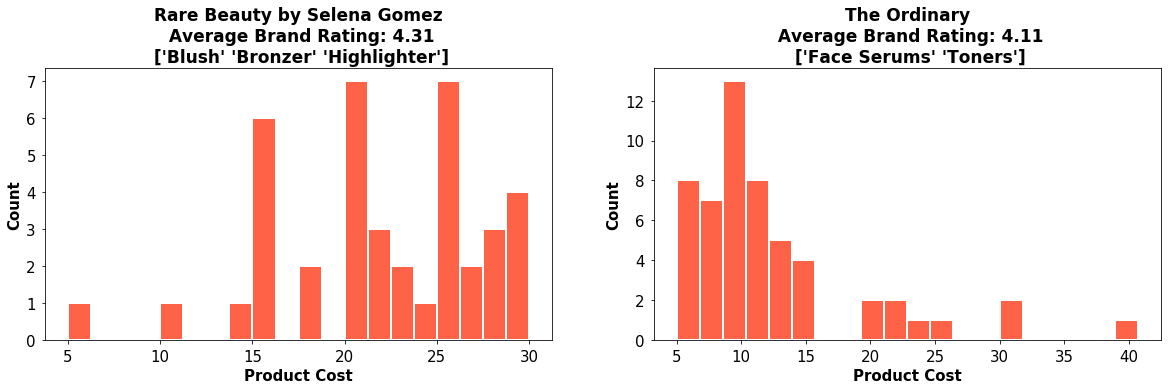

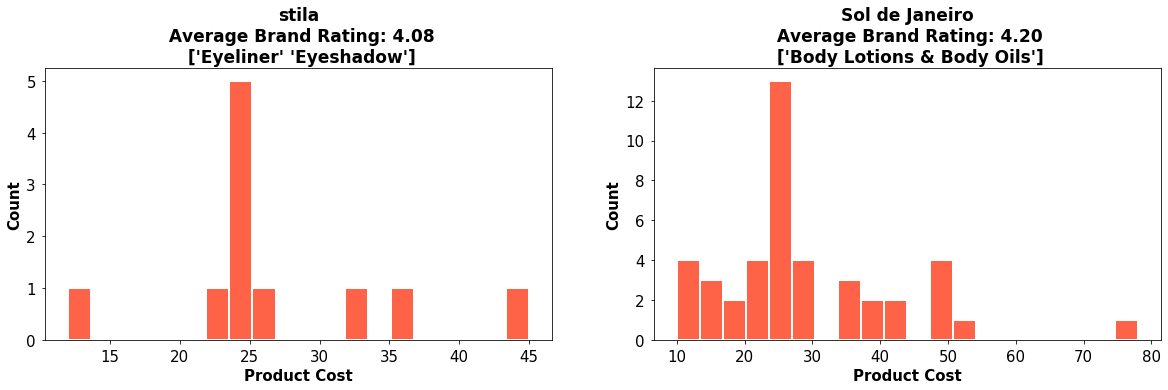

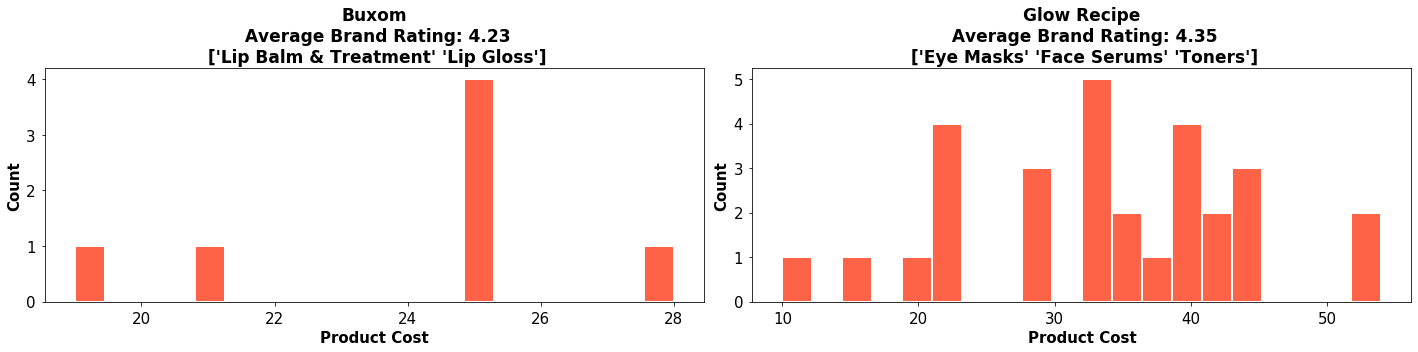

In [50]:
# plotting the price range top makeup and skincare brands together, in descending order based on loves_count
plt.style.use("seaborn-paper")
for i in zip(top_mu_brands.index[0:5], top_sc_brands.index[0:3]): #choosing a random subset of the data    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,5))
    
    top_items_mu = df[df.brand_name == i[0]].sort_values(by = "loves_count", ascending = False).tertiary_category.head(3).dropna().astype(str).values
    ax1.set_title("%s\n Average Brand Rating: %.2f\n %s" % (i[0], df[df.brand_name == i[0]].rating.mean(), \
              np.unique(top_items_mu)), weight = "bold", size = 17)
    plot1 = ax1.hist(df[df.brand_name == i[0]].price_usd, bins = 20, \
             color = "tomato", edgecolor = "w", linewidth = 2)
    ax1.set_xlabel("Product Cost", weight = "bold", size = 15)
    ax1.set_ylabel("Count", weight = "bold", size = 15)

    ax1.tick_params("both", labelsize = 15)
        
    
    top_items_sc = df[df.brand_name == i[1]].sort_values(by = "loves_count", ascending = False).tertiary_category.head(3).dropna().astype(str).values
    ax2.set_title("%s\n Average Brand Rating: %.2f\n %s" % (i[1], df[df.brand_name == i[1]].rating.mean(), np.unique(top_items_sc)), \
              weight = "bold", size = 17)
    plot2 = ax2.hist(df[df.brand_name == i[1]].price_usd, bins = 20, \
             color = "tomato", edgecolor = "w", linewidth = 2)
    ax2.set_xlabel("Product Cost", weight = "bold", size = 15)
    ax2.set_ylabel("Count", weight = "bold", size = 15)
    ax2.tick_params("both", labelsize = 15)
    
plt.tight_layout()
plt.show()
plt.close()

In [71]:
print("Makeup")
display(pd.pivot_table(df[(df.primary_category == "Makeup")], index = ["primary_category", "tertiary_category"], \
               values = ["loves_count", "price_usd"], aggfunc = "mean").sort_values(by = "loves_count", \
                                                                                    ascending = False).head(5))
print("----------------------------")
print("Skincare")
display(pd.pivot_table(df[(df.primary_category == "Skincare")], index = ["primary_category", "tertiary_category"], \
               values = ["loves_count", "price_usd"], aggfunc = "mean").sort_values(by = "loves_count", \
                                                                                    ascending = False).head(5))
print("----------------------------")
print("Hair")
display(pd.pivot_table(df[(df.primary_category == "Hair")], index = ["primary_category", "secondary_category"], \
               values = ["loves_count", "price_usd"], aggfunc = "mean").sort_values(by = "loves_count", \
                                                                                    ascending = False).head(5))
print("----------------------------")
print("Fragrance")
display(pd.pivot_table(df[(df.primary_category == "Fragrance")], index = ["primary_category", "tertiary_category"], \
               values = ["loves_count", "price_usd"], aggfunc = "mean").sort_values(by = "loves_count", \
                                                                                    ascending = False).head(5))

Makeup


loves_count  price_usd
primary_category tertiary_category                            
Makeup           Under-Eye Concealer  109348.333333  26.000000
                 Lip Plumper          107166.400000  28.266667
                 Contour               92759.739130  37.934783
                 Blush                 92616.880435  31.532609
                 Eyeshadow             85424.696970  29.242424

----------------------------
Skincare


loves_count  price_usd
primary_category tertiary_category                         
Skincare         BB & CC Creams     94013.000000  46.000000
                 Makeup Removers    64284.000000  27.400000
                 Face Wipes         54325.333333  15.666667
                 Eye Masks          45628.714286  38.392857
                 Face Oils          38419.560606  62.249697

----------------------------
Hair


loves_count   price_usd
primary_category secondary_category                                 
Hair             Shop by Concern            23478.000000   22.500000
                 Hair Styling & Treatments  17050.438573   34.960264
                 Shampoo & Conditioner      11028.283063   32.274385
                 Tools                       9253.156863  106.933660
                 Mini Size                   8809.821429   17.196429

----------------------------
Fragrance


loves_count   price_usd
primary_category tertiary_category                                  
Fragrance        Body Mist & Hair Mist      40706.050000   42.550000
                 Perfume                    18832.762324  128.661972
                 Perfume Gift Sets          12068.308824   67.286765
                 Rollerballs & Travel Size  11178.062718   37.794425
                 Cologne                     7586.792593  120.229630

## Conclusions:

#### Based on 